<center><h1>Patel_Datt_HW6</h1></center>

### Number of Late Days used: 1

Name: Datt Patel 
<br>
Github Username: dattpatel99 
<br>
USC ID: 

## 1. Tree-Based Methods

Import packages

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

### (a) Download the APS Failure data

In [106]:
train_set, test_set = pd.read_csv('../data/aps_failure_training_set.csv',skiprows=20, na_values='na'), pd.read_csv('../data/aps_failure_test_set.csv',skiprows=20,  na_values='na')

In [107]:
train_set = pd.concat([train_set[train_set.columns[1:]],train_set[['class']]], axis=1)
train_set

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0,neg
1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0,neg
2,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0,neg
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0,neg
4,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,...,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0,neg
59996,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0,neg
59997,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0,neg
59998,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,...,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0,neg


In [108]:
test_set = pd.concat([test_set[test_set.columns[1:]],test_set[['class']]], axis=1)
test_set

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0,neg
1,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0,neg
2,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0,neg
3,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0,neg
4,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,0.0,...,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0,neg
15996,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,0.0,...,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0,neg
15997,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,...,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0,neg
15998,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0,neg


### (b) Data Preparation

#### (i) Research what types of techniques are usually used

Reference: https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87

Common techniques inlcude: Mean, Mode, Median, KNN Imputation, Iterative Imputation

In [109]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [110]:
# Fit train imputer on only train dataset
imputer.fit(train_set.iloc[:,:-1])

SimpleImputer()

In [111]:
# Train x
train = imputer.transform(train_set.iloc[:,:-1])
# Test x
test = imputer.transform(test_set.iloc[:,:-1])

In [112]:
train_y, test_y = train_set[['class']], test_set[['class']]
train_x, test_x = pd.DataFrame(train, columns=train_set.columns[:-1]), pd.DataFrame(test, columns=test_set.columns[:-1])

#### (ii) Calculate the coefficient of variation

In [113]:
# Combine Train and Test
full_data = pd.concat([train_x, test_x])
full_data

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852.0,0.713189,2.130706e+09,892.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,18.0,0.000000,5.200000e+01,46.000000,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,79636.0,0.713189,1.670000e+03,1518.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,110.0,0.713189,3.600000e+01,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [114]:
data_stats = full_data.describe().loc[['mean','std'], :].T
cv_data = data_stats['std']/data_stats['mean']

In [115]:
print('Dataset CV: {}'.format(cv_data))

Dataset CV: aa_000      4.328608
ab_000      2.207351
ac_000      2.167798
ad_000    193.955307
ae_000     22.282263
             ...    
ee_007      4.885304
ee_008      3.335353
ee_009      5.754213
ef_000     47.781107
eg_000     45.711130
Length: 170, dtype: float64


#### (iii) Plot a correlation matrix

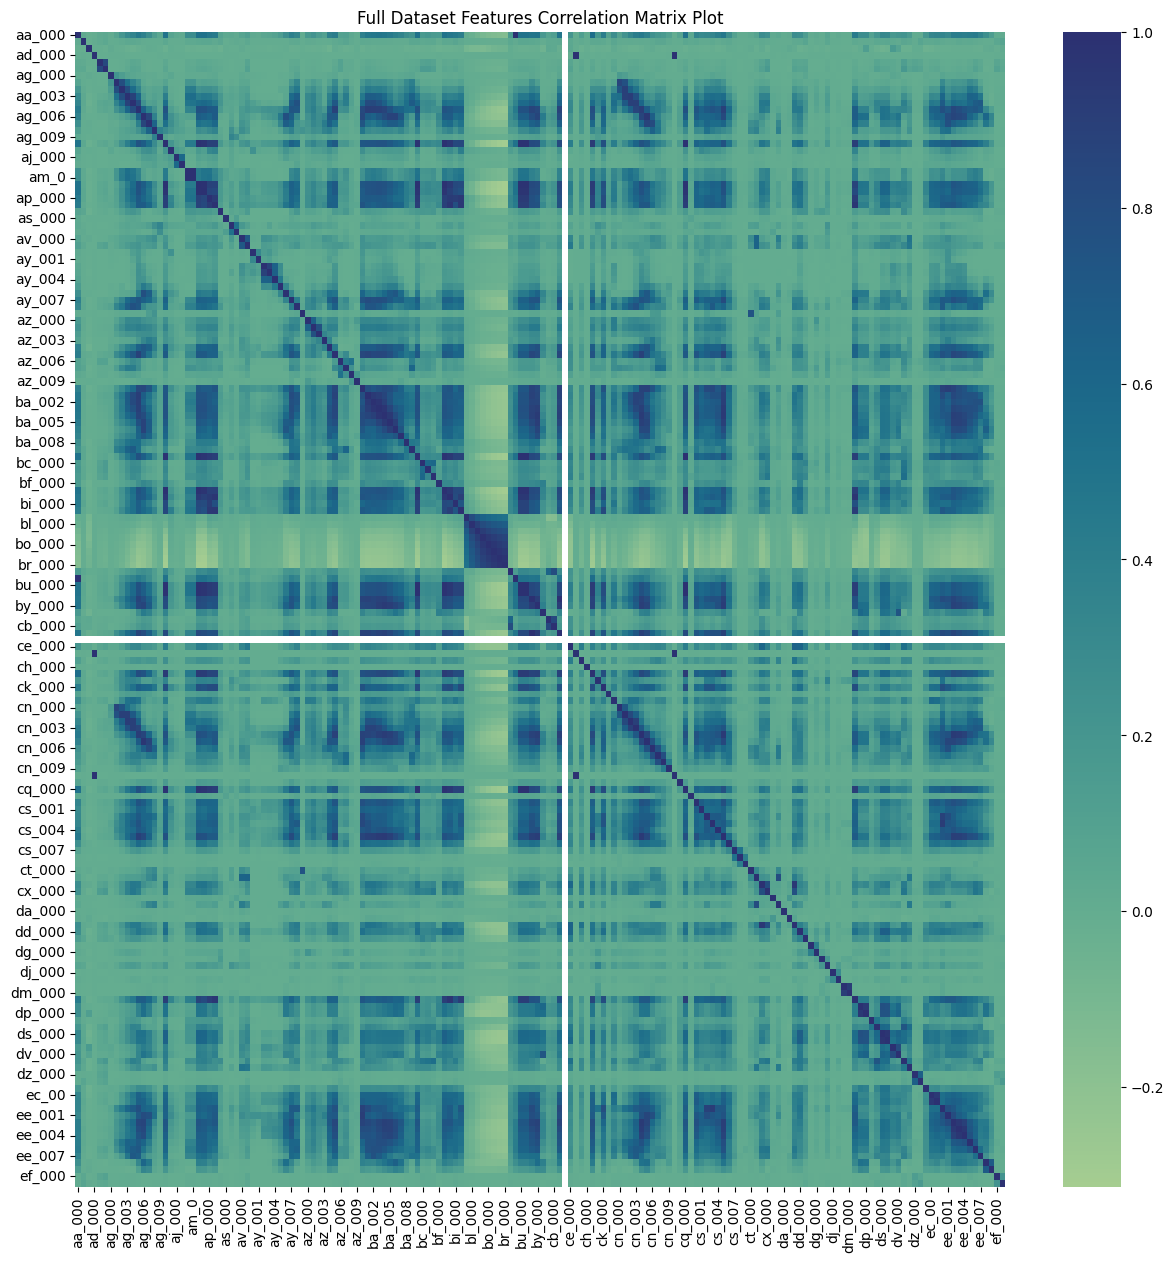

In [116]:
fig, axes = plt.subplots(figsize=(15, 15))
sns.heatmap(full_data.corr(), cmap='crest',ax=axes)
plt.title("Full Dataset Features Correlation Matrix Plot")
plt.show()

#### (iv) Make scatter plots and box plots

In [117]:
# Pick Root(170) best features
best_data = cv_data.sort_values(ascending=False)[:int(np.sqrt(170))]
best_data

cf_000    194.438323
co_000    194.089168
ad_000    193.955307
cs_009    193.045035
dj_000    120.084900
df_000    116.138172
as_000    114.464381
dh_000    111.946396
ag_000     91.351287
au_000     86.293581
ak_000     78.559993
az_009     77.894525
ay_009     77.457761
dtype: float64

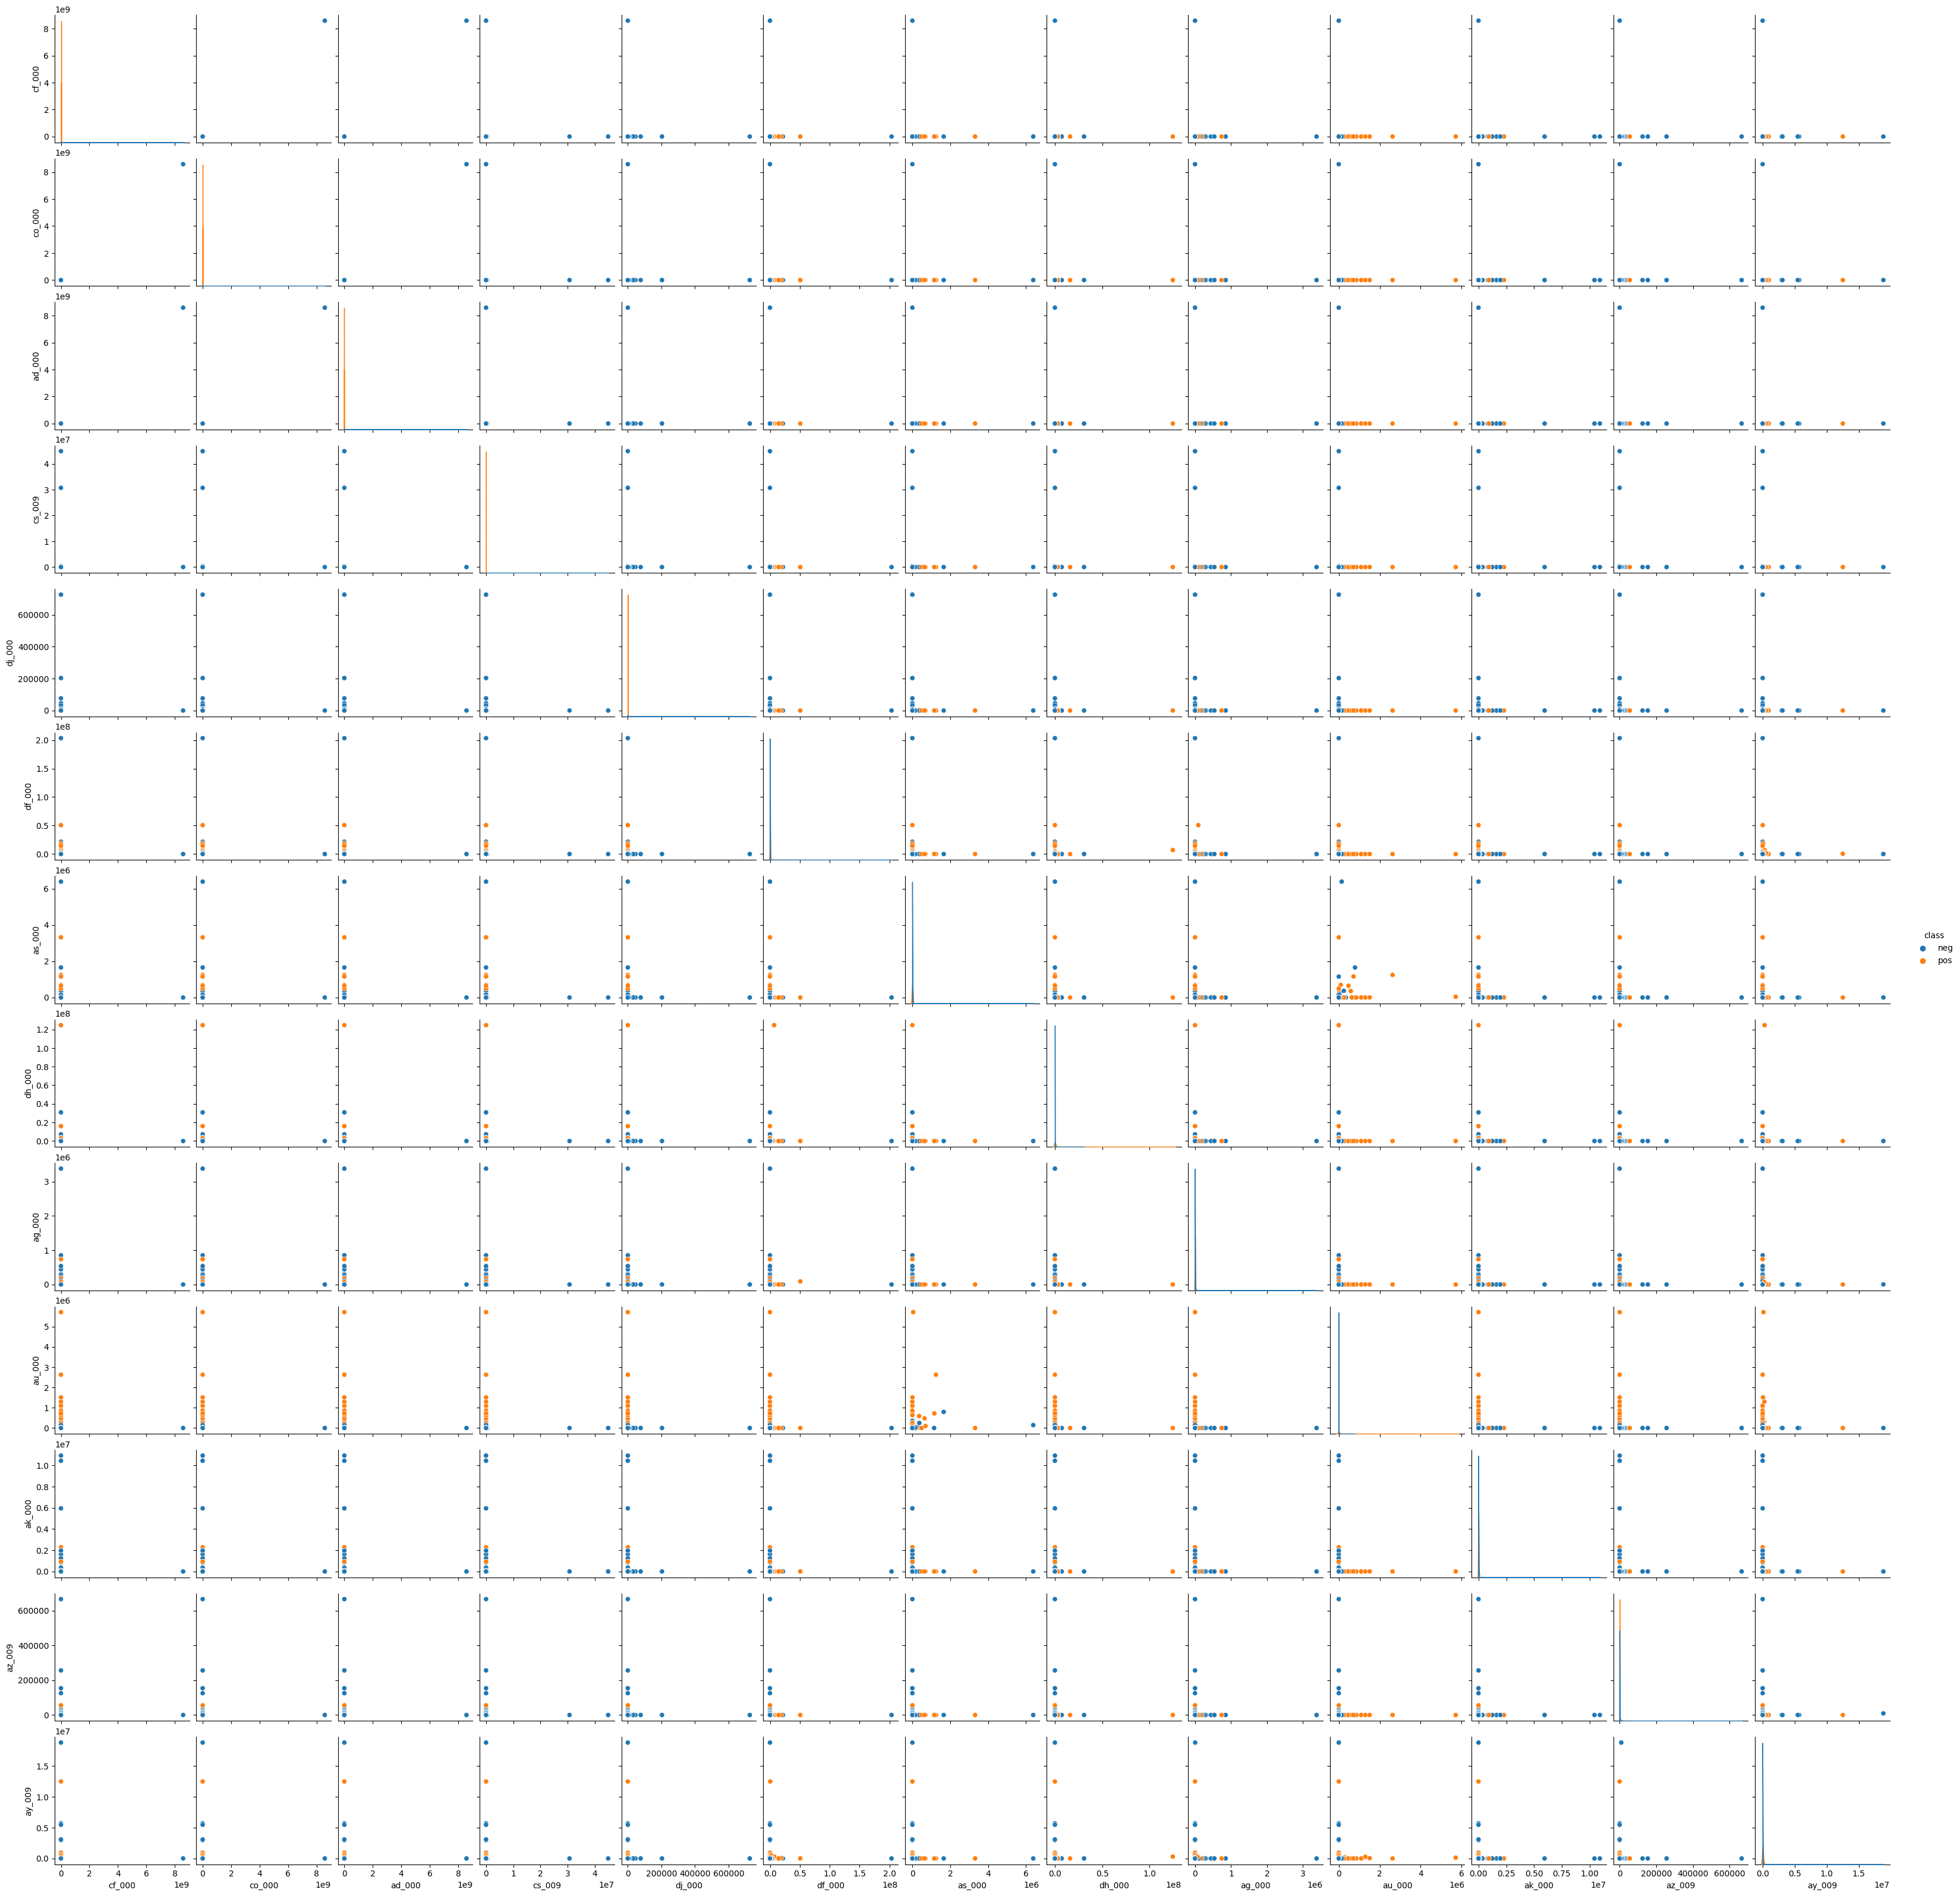

In [118]:
class_table = pd.concat([train_y, test_y])
plotting_table = pd.concat([full_data[best_data.index], class_table],axis=1)
sns.pairplot(plotting_table, hue='class')

[None]

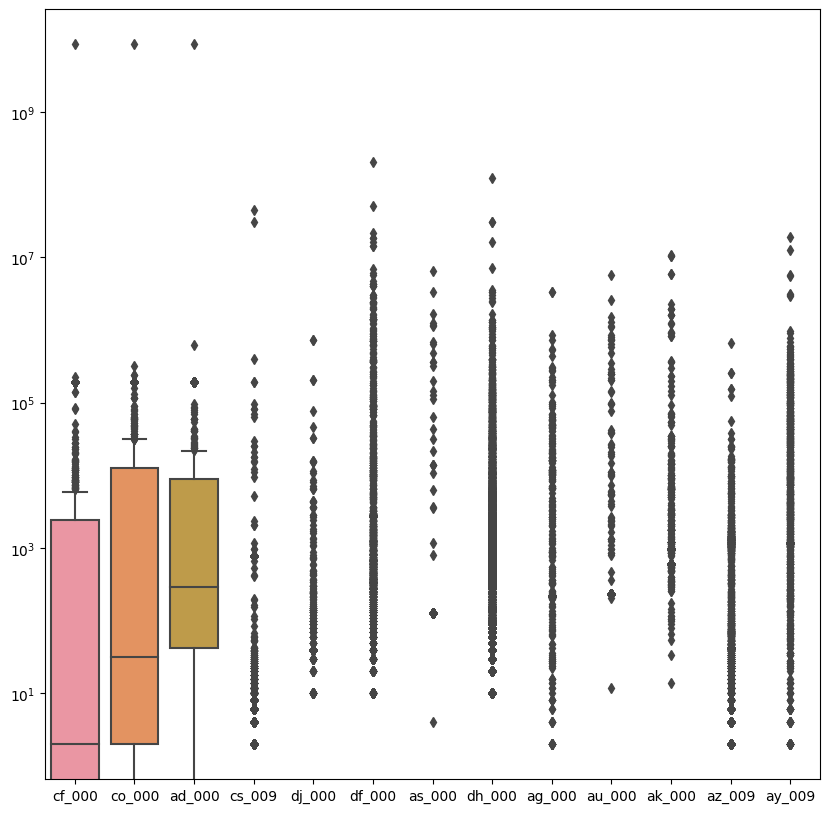

In [119]:
fig, axes = plt.subplots(figsize=(10, 10))
boxPlot = sns.boxplot(data=plotting_table, ax=axes)
boxPlot.set(yscale='log')

Set the scale on y-axis to be 'log' for better visualization.

It is not possible to tell which features are relevant based on the scatter plot.

#### (v) Is this data set imbalanced?

In [120]:
classes = class_table['class'].unique()
print('For class {} there are {} values.'.format(classes[0],class_table[class_table['class'] == classes[0]].shape[0]))
print('For class {} there are {} values.'.format(classes[1],class_table[class_table['class'] == classes[1]].shape[0]))
print('Therefore there is imbalance in the data')

For class neg there are 74625 values.
For class pos there are 1375 values.
Therefore there is imbalance in the data


### (c) Train a random forest

In [121]:
def printResults(details, y_true, y_hat, y_prob):
    conf_matrix = confusion_matrix(y_true,y_hat)
    acc = accuracy_score(y_true,y_hat)
    fpr, tpr, thres = roc_curve(y_true, y_prob[:, 1], pos_label='pos')
    plt.plot(fpr, tpr, label="ROC: Area Under the Curve = {}".format(auc(fpr, tpr)))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve {}".format(details))
    plt.legend()
    plt.show()
    print('Confusion Matrix for {}:\n{}'.format(details, conf_matrix))
    print('Accuracy Score for {}:\n{}'.format(details, acc))


In [122]:
forrest = RandomForestClassifier(max_depth=5, random_state=97, oob_score=True)
forrest.fit(train_x, train_y)
forrest_train_pred = forrest.predict(train_x)
forrest_train_prob_pred = forrest.predict_proba(train_x)
forrest_test_pred = forrest.predict(test_x)
forrest_test_prob_pred = forrest.predict_proba(test_x)

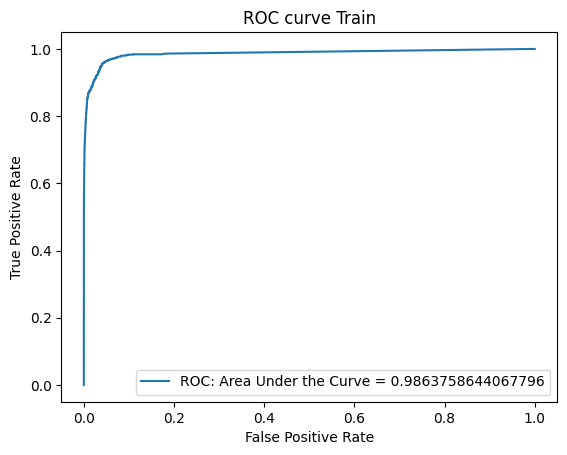

Confusion Matrix for Train:
[[58982    18]
 [  436   564]]
Accuracy Score for Train:
0.9924333333333333


In [123]:
printResults('Train', train_y, forrest_train_pred, forrest_train_prob_pred)

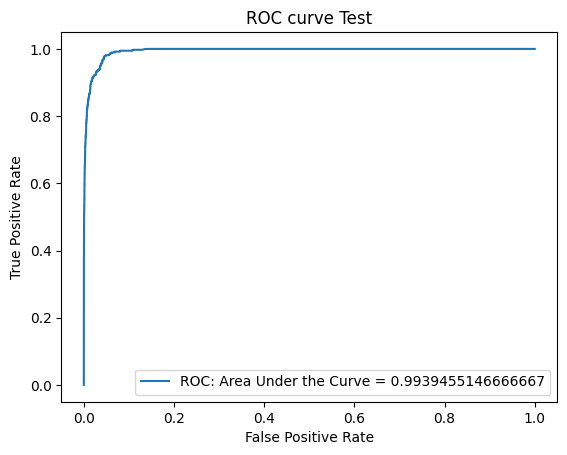

Confusion Matrix for Test:
[[15613    12]
 [  183   192]]
Accuracy Score for Test:
0.9878125


In [124]:
printResults('Test', test_y, forrest_test_pred, forrest_test_prob_pred)

In [125]:
trainOOB = 1 - forrest.oob_score_
print('Train out of bag error is {}\nTest error is: {}'.format(trainOOB, 1-accuracy_score(test_y, forrest_test_pred)))

Train out of bag error is 0.009099999999999997
Test error is: 0.012187500000000018


Out of bag error is smaller than the test error.

### (d) Research class imbalance in random forest

In [126]:
imb_forrest = RandomForestClassifier(max_depth=5, random_state=97, oob_score=True, class_weight='balanced')
imb_forrest.fit(train_x, train_y)
imb_forrest_train_pred = imb_forrest.predict(train_x)
imb_forrest_train_prob_pred = imb_forrest.predict_proba(train_x)
imb_forrest_test_pred = imb_forrest.predict(test_x)
imb_forrest_test_prob_pred = imb_forrest.predict_proba(test_x)

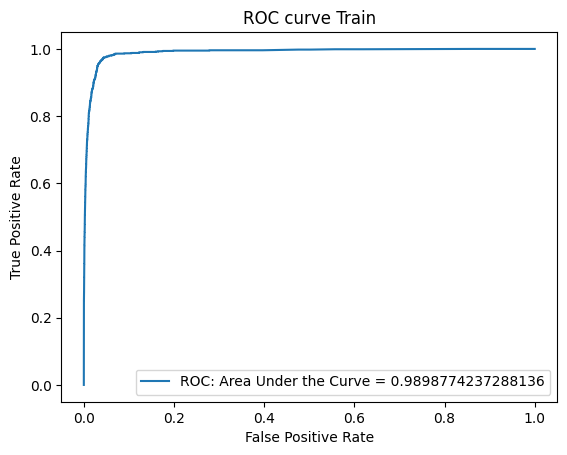

Confusion Matrix for Train:
[[56611  2389]
 [   32   968]]
Accuracy Score for Train:
0.95965


In [127]:
printResults('Train', train_y, imb_forrest_train_pred, imb_forrest_train_prob_pred)

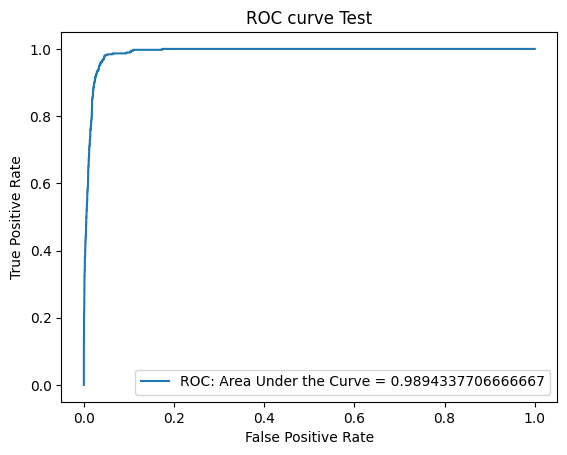

Confusion Matrix for Test:
[[15017   608]
 [   15   360]]
Accuracy Score for Test:
0.9610625


In [128]:
printResults('Test', test_y, imb_forrest_test_pred, imb_forrest_test_prob_pred)

In [129]:
imb_trainOOB = 1 - imb_forrest.oob_score_
print('Train out of bag error is {}\nTest error is: {}'.format(imb_trainOOB, 1-accuracy_score(test_y, imb_forrest_test_pred)))

Train out of bag error is 0.041716666666666624
Test error is: 0.03893749999999996


Test error is smaller than the Out of Bag error

Based on the two results shown in (c) and (d), we see that the test accuracy for model in (c) is better than that of (d). However, this is because there is a larger number of datapoints which have 'neg' class. This leads the model to predict 'neg' for more points leading to larger error in prediction of positive class (as we see in the confusion matrix). This issue is fixed by the model in (d) as we compensate the balance giving is a lower test accuracy but better prediction results for 'pos' class.

### (e) XGBoost and Model Trees

In [130]:
train_y.loc[train_y["class"] == "neg", "class"] = 0
train_y.loc[train_y["class"] == "pos", "class"] = 1
train_y = train_y['class'].astype('category')

In [131]:
test_y.loc[test_y["class"] == "neg", "class"] = 0
test_y.loc[test_y["class"] == "pos", "class"] = 1
test_y = test_y['class'].astype('category')

In [132]:
# define the models
xgb_model = xgb.XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=150, objective='binary:logistic')
# define the parameter grid
param_grid = {'reg_alpha': [10**i for i in range(-5, 5)]}
splitter = KFold(n_splits=5, shuffle=True, random_state=97)
# perform the grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=splitter)
grid_search.fit(train_x, train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=97, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     int...
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=4,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=150, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'reg_alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                                       100, 1000, 10000]},
             scoring='accuracy')

In [133]:
# get the best model and evaluate it on the test set
best_model = grid_search.best_estimator_

train_y_pred = best_model.predict(train_x)
test_y_pred = best_model.predict(test_x)

train_y_pred_proba = best_model.predict_proba(train_x)
test_y_pred_proba = best_model.predict_proba(test_x)

train_eval = accuracy_score(train_y, train_y_pred)
test_eval = accuracy_score(test_y, test_y_pred)

# print the results
print('Best parameters:', grid_search.best_params_)
print('Best Train Score: {}'.format(train_eval))
print('Test Accuracy score:', test_eval)

Best parameters: {'reg_alpha': 1}
Best Train Score: 0.9982166666666666
Test Accuracy score: 0.9933125


In [134]:
def printXGBDetails(details, y_true, y_hat, y_pred_prob):
    conf_matrix = confusion_matrix(y_true,y_hat)
    acc = accuracy_score(y_true,y_hat)
    fpr, tpr, thres = roc_curve(y_true, y_pred_prob[:, 1])
    plt.plot(fpr, tpr, label="ROC: Area Under the Curve = {}".format(auc(fpr, tpr)))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve {}".format(details))
    plt.legend()
    plt.show()
    print('Confusion Matrix for {}:\n{}'.format(details, conf_matrix))
    print('Accuracy Score for {}:\n{}'.format(details, acc))

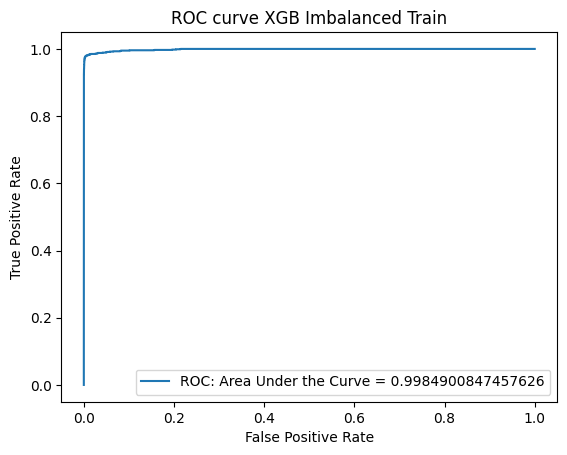

Confusion Matrix for XGB Imbalanced Train:
[[58992     8]
 [   99   901]]
Accuracy Score for XGB Imbalanced Train:
0.9982166666666666


In [135]:
printXGBDetails('XGB Imbalanced Train', train_y, train_y_pred, train_y_pred_proba)

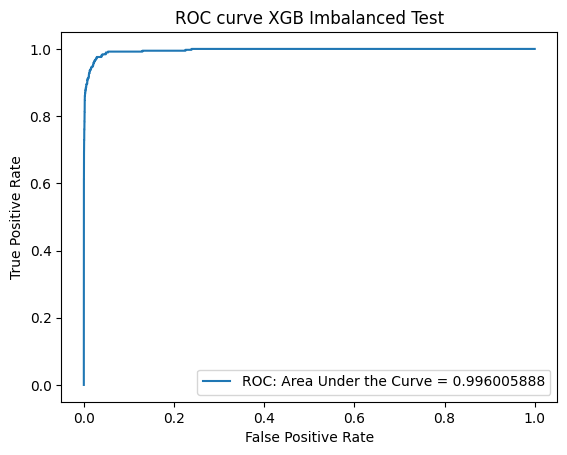

Confusion Matrix for XGB Imbalanced Test:
[[15611    14]
 [   93   282]]
Accuracy Score for XGB Imbalanced Test:
0.9933125


In [136]:
printXGBDetails('XGB Imbalanced Test', test_y, test_y_pred, test_y_pred_proba)

### (f) Use SMOTE to pre-process your data

In [137]:
# define the models
smote_xgb_model = xgb.XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=150, objective='binary:logistic')
# define the parameter grid
oversample = SMOTE()
# perform the grid search
pipe = Pipeline(steps=[("smote", oversample), ("xgb", smote_xgb_model)])
balanced_splitter = StratifiedKFold(5, shuffle=True, random_state=97)
smote_param_grid = {'xgb__reg_alpha': [10**i for i in range(-5, 5)]}
smote_grid_search = GridSearchCV(pipe, param_grid=smote_param_grid, scoring='accuracy', cv=balanced_splitter)
smote_grid_search.fit(train_x, train_y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=97, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gp...
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=4,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=150,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgb__reg_alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                            10, 100, 1000, 10000]},
             scoring='accuracy')

In [138]:
# get the best model and evaluate it on the test set
smote_best_model = smote_grid_search.best_estimator_

smote_train_y_pred = smote_best_model.predict(train_x)
smote_test_y_pred = smote_best_model.predict(test_x)

smote_train_y_pred_proba = smote_best_model.predict_proba(train_x)
smote_test_y_pred_proba = smote_best_model.predict_proba(test_x)

smote_train_eval = accuracy_score(train_y, smote_train_y_pred)
smote_test_eval = accuracy_score(test_y, smote_test_y_pred)

# print the results
print('Best parameters with SMOTE:', smote_grid_search.best_params_)
print('Best Train Score with SMOTE: {}'.format(smote_train_eval))
print('Test Accuracy score with SMOTE:', smote_test_eval)

Best parameters with SMOTE: {'xgb__reg_alpha': 0.01}
Best Train Score with SMOTE: 0.9938666666666667
Test Accuracy score with SMOTE: 0.989875


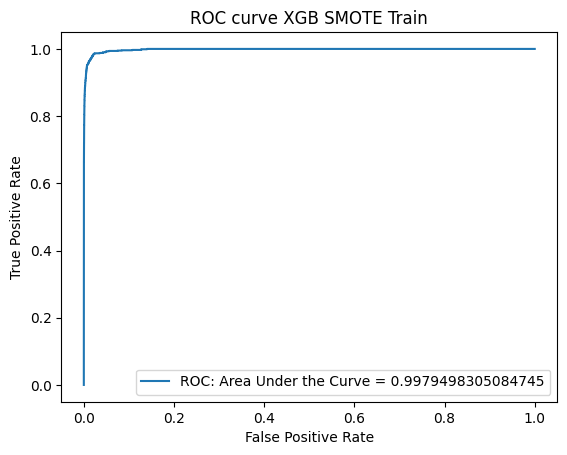

Confusion Matrix for XGB SMOTE Train:
[[58707   293]
 [   75   925]]
Accuracy Score for XGB SMOTE Train:
0.9938666666666667


In [139]:
printXGBDetails('XGB SMOTE Train', train_y, smote_train_y_pred, smote_train_y_pred_proba)

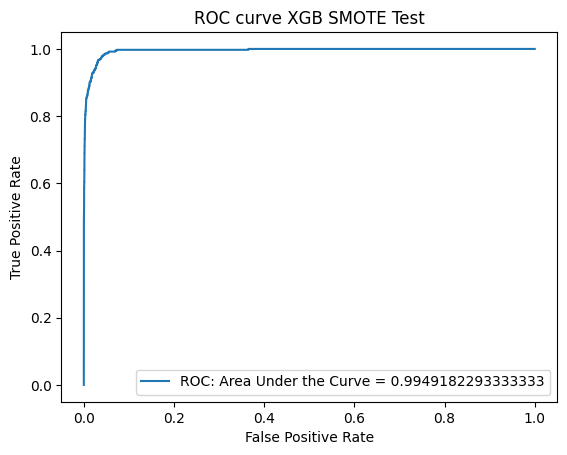

Confusion Matrix for XGB SMOTE Test:
[[15517   108]
 [   54   321]]
Accuracy Score for XGB SMOTE Test:
0.989875


In [140]:
printXGBDetails('XGB SMOTE Test', test_y, smote_test_y_pred, smote_test_y_pred_proba)

### Comparison

Based on the accuracy scores and confusion matrix after applying SMOTE the score decreases and the model has more errors. However, in terms of the errors in predicting 'pos' class we notice that more points labelled as 'pos' are calssified correctly. 

## 2. ISLR 6.6.3

(a) 
ANS: iv
As 's' increases from 0, the Beta's increase to their least square estimates. Therefore the training error for betas is maximum and steadily decreases to Ordinary least square RSS.

(b)
ANS: ii
When 's' is 0 all the betas are 0 and the model is simple leading to a high test RSS. As 's' goes up betas become some non-zero value and the model stats to fit the test data better leading to a decrease in test RSS. However, after a while betas start to overfit the train data leading to increase in test RSS again.

(c)
ANS: iii
As aforementioned, if 's' is 0 model is good at predicting a constant with no variance. As 's' increases models include more Betas and their values start to increase. In this process there is a point where values of betas become highly dependent on training data leading to an increase in variance.

(d)
ANS: iv
Based on the answer in Q(c) when s increases from 0 the variance also increases. Due to the variance-bias trade off if variance is increasing then the bias is decreasing.

(e)
ANS: v
Based on the bias-variance trade off the changes in variance are covered by the changed in bias and therefore the irreducible error does not change. 


## 3. ISLR 6.6.5

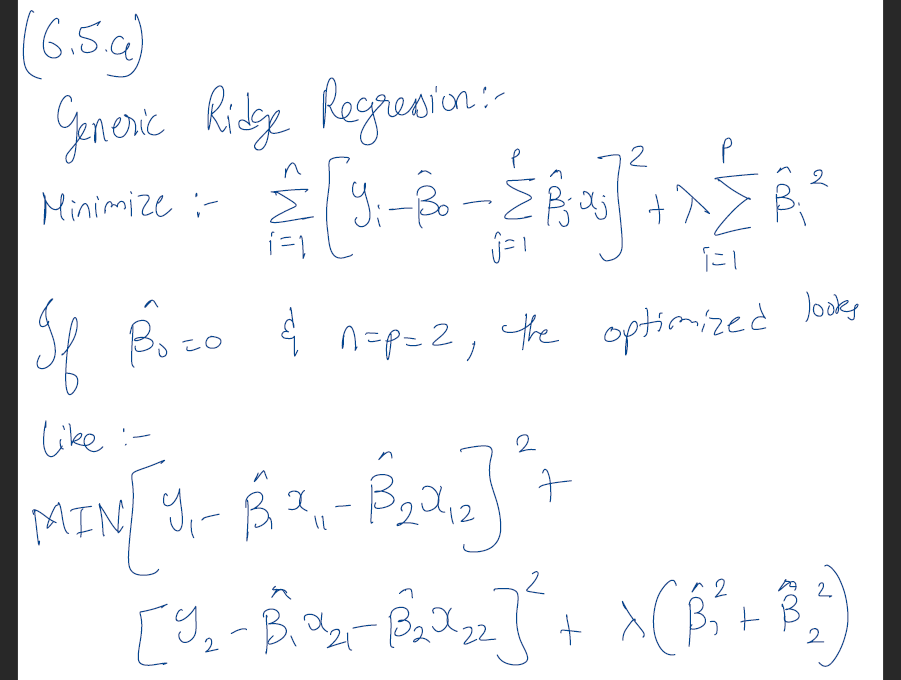

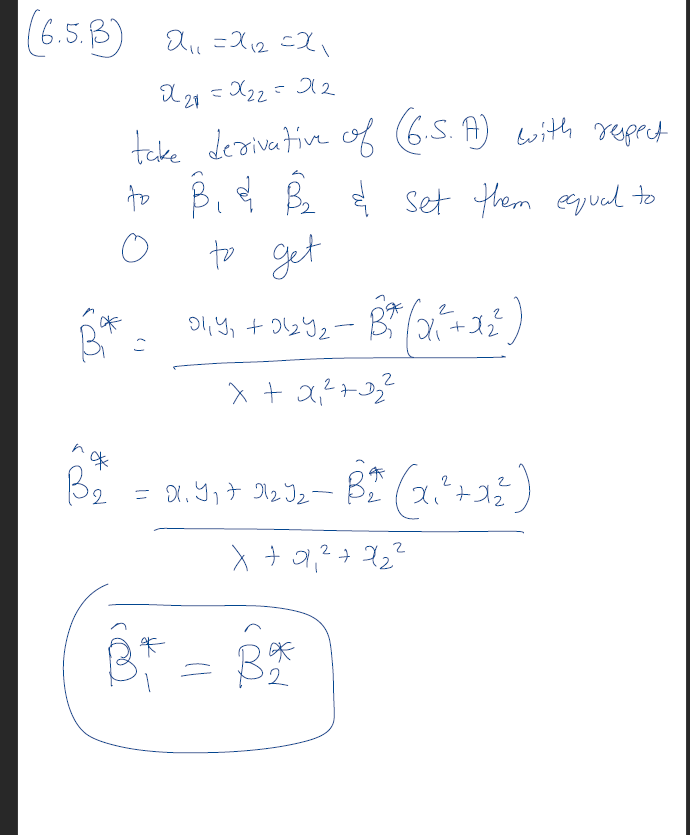

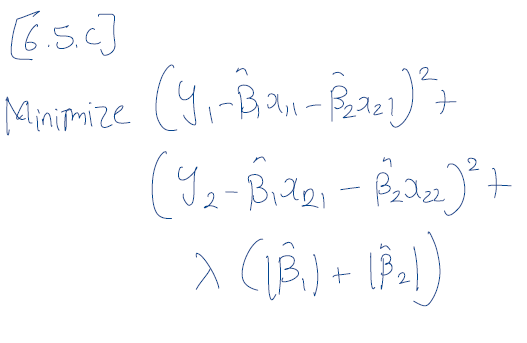

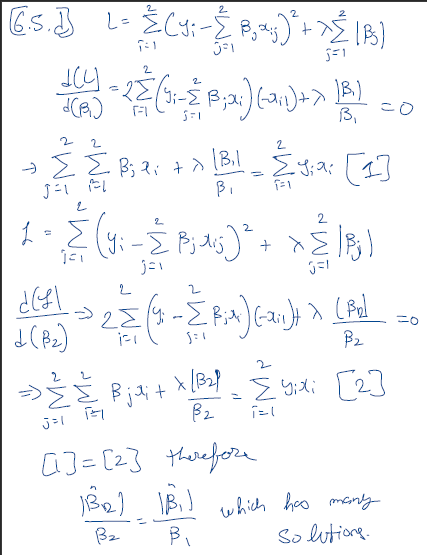

## 4. ISLR 8.4.5

In [141]:
probabilities = np.array([0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75])
print('Based on majority voting. X is RED = {}'.format(sum(probabilities >= 0.5) > sum(probabilities < 0.5)))
print()
print('The average of the probabiliites is {}.\nWhich is less than 50% therefore prediction will be GREEN'.format(np.mean(probabilities)))

Based on majority voting. X is RED = True

The average of the probabiliites is 0.45.
Which is less than 50% therefore prediction will be GREEN


## 5. ISLR 9.7.3

In [142]:
x1 = [3,2,4,1,2,4,4]
x2 = [4,2,4,4,1,3,1]
y = ['Red','Red','Red','Red','Blue','Blue','Blue']
c = ["red", "red", "red", "red", "blue", "blue", "blue"]

### (A)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


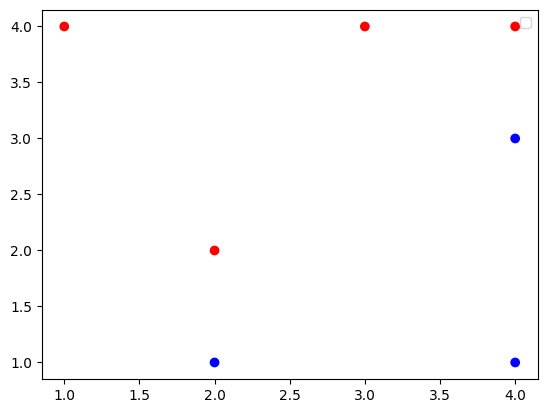

In [143]:
plt.scatter(x1, x2, c=c)
plt.legend(loc='best')
plt.show()

#### (B)

The maximum margin has to be between the points (4,3), (2,1) and (4,4),(2,2). => Midpoints the maximum margin must pass are (2, 1.5) and (4,3.5). Therefore the slope is (3.5 - 1.5)/(4-2) == 1. And the intercept for this is 1.5 - 2 => -0.5

The equation of the hyperplane is 0.5 - X1 + X2 = 0

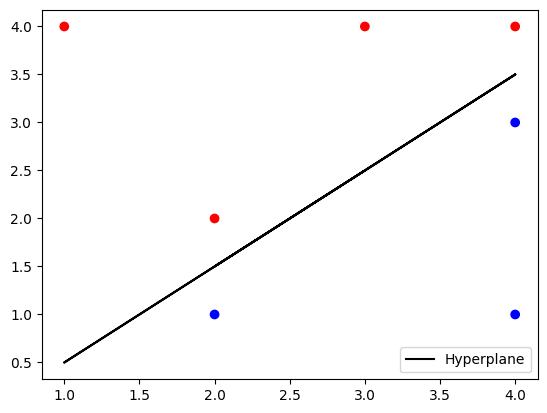

In [144]:
plt.plot(x1,np.array(x1)-0.5,color='black', label='Hyperplane')
plt.scatter(x1,x2, c=c)
plt.legend(loc='best')
plt.show()

### (C)

The equaiton to classify for red is: 0.5 - X1 + X2 > 0

### (D)

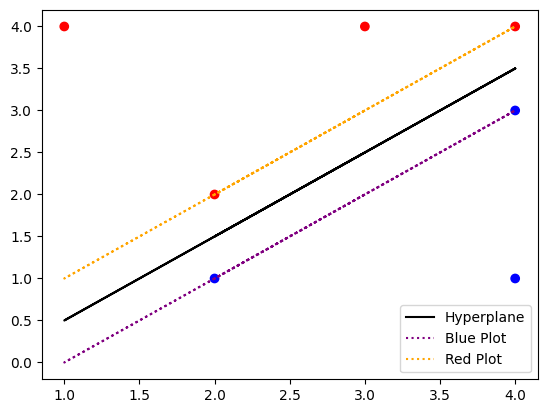

In [145]:
plt.plot(x1,np.array(x1)-0.5,color='black', label='Hyperplane')
plt.plot(x1,np.array(x1)-1,color='purple', label='Blue Plot', linestyle='dotted')
plt.plot(x1,np.array(x1),color='orange', linestyle='dotted', label='Red Plot')
plt.scatter(x1,x2, c=c)
plt.legend(loc='best')
plt.show()

### (E)

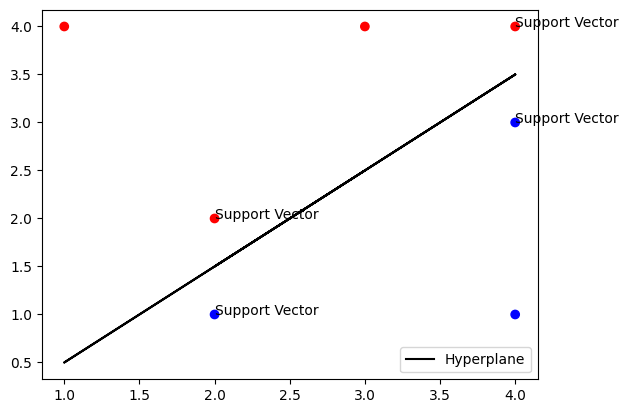

In [146]:
plt.plot(x1,np.array(x1)-0.5,color='black', label='Hyperplane')
plt.scatter(x1,x2, c=c)
plt.text(2,2,'Support Vector')
plt.text(2,1,'Support Vector')
plt.text(4,3,'Support Vector')
plt.text(4,4,'Support Vector')
plt.legend(loc='best')
plt.show()

### (F)

If the point (4,1) was slightly moved it would not impact the Maximal Margin Hyperplane since the movement would be outside the marginal area.

### (G)

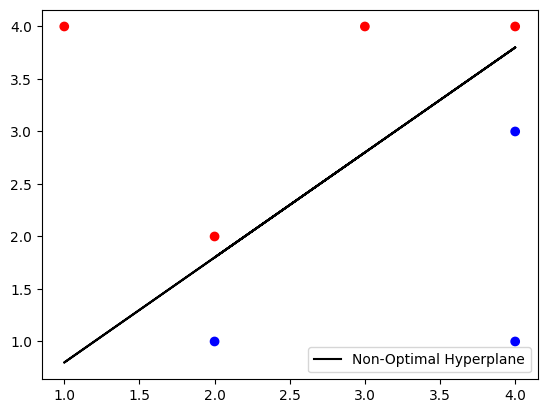

In [147]:
plt.plot(x1,np.array(x1)-0.2,color='black', label='Non-Optimal Hyperplane')
plt.scatter(x1,x2, c=c)
plt.legend(loc='best')
plt.show()

EQN: -0.2 - X1 + X2 = 0

### (H)

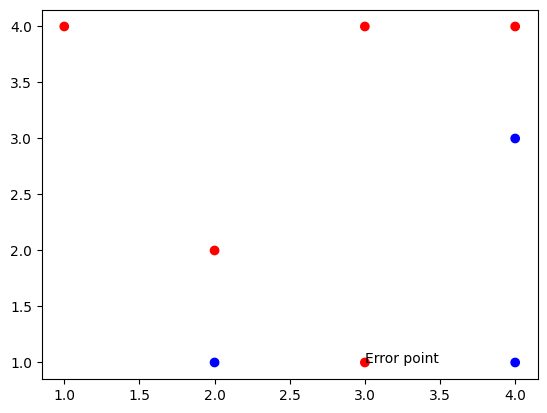

In [148]:
x1 = [3,2,4,1,2,4,4,3]
x2 = [4,2,4,4,1,3,1,1]
y = ['Red','Red','Red','Red','Blue','Blue','Blue','Red']
c = ["red", "red", "red", "red", "blue", "blue", "blue", "red"]
plt.scatter(x1,x2, c=c)
plt.text(3,1,'Error point')
plt.show()